In [63]:
import requests
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from matplotlib import style

In [64]:
symbol = "CVNA"
api_key = "CEN1NMZCENKRX5KS"
start_date = dt.datetime.now() - dt.timedelta(days=365*6)
start_date = start_date.strftime("%Y-%m-%d")

In [65]:
url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}&startdate={start_date}'
r = requests.get(url)
balance_sheet = r.json()

print(balance_sheet)

In [71]:
ticker = symbol
closing_price = yf.Ticker(ticker).history(period = '1d')['Close'].iloc[-1]

print(f'Closing Price: {closing_price}')

Closing Price: 35.56999969482422


In [67]:
#Current Assets 2019 - 2023

total_current_assets_2019 = float(balance_sheet['annualReports'][4]['totalCurrentAssets'])
total_current_assets_2020 = float(balance_sheet['annualReports'][3]['totalCurrentAssets'])
total_current_assets_2021 = float(balance_sheet['annualReports'][2]['totalCurrentAssets'])
total_current_assets_2022 = float(balance_sheet['annualReports'][1]['totalCurrentAssets'])
total_current_assets_2023 = float(balance_sheet['annualReports'][0]['totalCurrentAssets'])

total_current_assets_for_5years = [total_current_assets_2023, total_current_assets_2022, total_current_assets_2021, total_current_assets_2020, total_current_assets_2019]
date = [2023, 2022, 2021, 2020, 2019]

date_current_assets = {'Current Assets For 5 years': total_current_assets_for_5years, 'Date': date, 'Stock': symbol}

df_assets = pd.DataFrame(date_current_assets)
print(df_assets)

style.use('bmh')
plt.title('Current Assets')
plt.xlabel("Date")
plt.ylabel("Total Current Assets for 5 years")
plt.plot(date, total_current_assets_for_5years)
plt.legend(["Total Current Assets"])
plt.grid(True)
plt.xticks(date, [int(d) for d in date])
plt.show()

style.use('fast')
plt.title("Total Current Assets")
plt.xlabel("Date")
plt.ylabel("Total Current Assets")
plt.bar(df_assets['Date'], df_assets['Current Assets For 5 years'], color='green', edgecolor='black')
plt.grid(True)
plt.show()



   Total Current Liabilities  Date Stock
0               2.592000e+09  2023  CVNA
1               2.890000e+09  2022  CVNA
2               4.670000e+08  2021  CVNA
3               8.648700e+08  2020  CVNA
4               3.295110e+08  2019  CVNA


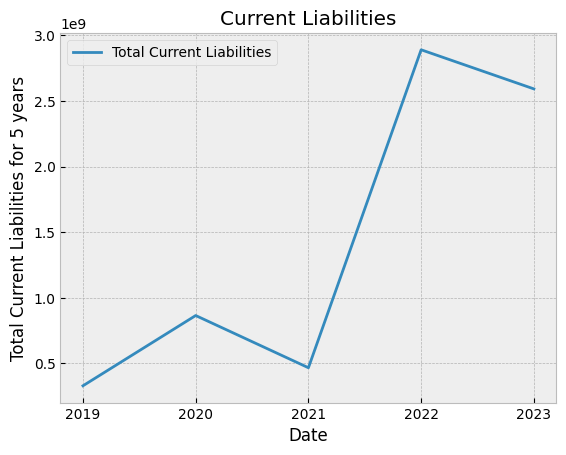

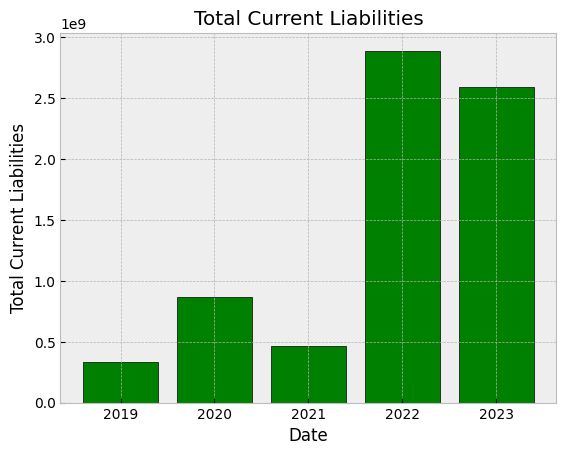

In [70]:
#Current Liabilities 2019-2020

total_current_liabilities_2019 = float(balance_sheet['annualReports'][4]['totalCurrentLiabilities'])
total_current_liabilities_2020 = float(balance_sheet['annualReports'][3]['totalCurrentLiabilities'])
total_current_liabilities_2021 = float(balance_sheet['annualReports'][2]['totalCurrentLiabilities'])
total_current_liabilities_2022 = float(balance_sheet['annualReports'][1]['totalCurrentLiabilities'])
total_current_liabilities_2023 = float(balance_sheet['annualReports'][0]['totalCurrentLiabilities'])

total_current_liabilities_for_5years = [total_current_liabilities_2023, total_current_liabilities_2022, total_current_liabilities_2021, total_current_liabilities_2020, total_current_liabilities_2019]
date1 = [2023, 2022, 2021, 2020, 2019]

date_current_Liabilities = {'Total Current Liabilities': total_current_liabilities_for_5years, "Date" : date1, "Stock" : symbol}

df_liabilities = pd.DataFrame(date_current_Liabilities)
print(df_liabilities)

style.use('bmh')
plt.title('Current Liabilities')
plt.xlabel("Date")
plt.ylabel("Total Current Liabilities for 5 years")
plt.plot(date1, total_current_liabilities_for_5years)
plt.legend(["Total Current Liabilities"])
plt.grid(True)
plt.xticks(date, [int(d) for d in date])
plt.show()

style.use('fast')
plt.title("Total Current Liabilities")
plt.xlabel("Date")
plt.ylabel("Total Current Liabilities")
plt.bar(df_liabilities['Date'], df_liabilities['Total Current Liabilities'], color='green', edgecolor='black')
plt.grid(True)
plt.show()


In [ ]:
# Assets vs Liabilities

plt.title('Current Assets and Liabilities')
plt.xlabel("Date")
plt.ylabel("Amount")
plt.plot(date, total_current_assets_for_5years, label='Total Current Assets', color = 'blue')
plt.plot(date1, total_current_liabilities_for_5years, label='Total Current Liabilities', color = 'pink')
plt.legend()
plt.grid(True)
plt.xticks(date, [int(d) for d in date])
plt.show()

In [ ]:
# Cash debt Difference
total_debt = float(balance_sheet['annualReports'][0]['currentDebt'])
cash_and_equivalents = float(balance_sheet['annualReports'][0]['cashAndCashEquivalentsAtCarryingValue'])
cash_debt_difference = cash_and_equivalents - total_debt

print(f'Cash debt Difference: {cash_debt_difference:,}')

In [ ]:
#debt to Equity
debt = float(balance_sheet['annualReports'][0]['totalLiabilities'])
equity = float(balance_sheet['annualReports'][0]['totalShareholderEquity'])

debt_to_equity = debt / equity

print(f'Debt to Equity ratio: {debt_to_equity:,}')

In [ ]:
current_assets = float(balance_sheet['annualReports'][0]['totalCurrentAssets'])
current_liabilities = float(balance_sheet['annualReports'][0]['totalCurrentLiabilities'])

current_ratio = current_assets / current_liabilities

print(f'Current Ratio: {current_ratio:,}')

In [ ]:
inventory = float(balance_sheet['annualReports'][0]['inventory'])

liquidity_ratio = (current_assets - inventory) / current_liabilities

print(f'Liquidity Ratio: {liquidity_ratio:,}')

In [ ]:
#Vertical Analysis
#Horizonral Analysis
#Working Capital Analysis
#Debt Ratio
#Return on Assets
#Return on Equity